Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime as dt
from scipy import stats

Read CSV file

In [2]:
df = pd.read_csv('./callcenters.csv')
df.head()

,id,time_of_call,call_center,successful_call,assistant_enabled,agent_id
0,0,2019-04-04 11:33:51.713444+00:00,Ida,0.0,False,8331
1,1,2019-04-09 14:27:50.291550+00:00,Ida,0.0,True,8331
2,2,2019-04-09 17:39:22.662744+00:00,Ida,0.0,True,8331
3,3,2019-04-11 09:03:31.830776+00:00,Ida,0.0,True,8331
4,4,2019-04-11 11:49:32.845973+00:00,Ida,0.0,True,8331


Number of calls

In [3]:
calls = df.groupby('call_center')['id'].count()
calls

call_center
Autonoe      9673
Dia          2790
Ida         23391
Linus       14034
Mathilde    18057
Name: id, dtype: int64

Number of successful calls

In [4]:
successful_calls = df.groupby('call_center')['successful_call'].sum()
successful_calls

call_center
Autonoe      587.0
Dia          305.0
Ida         1557.0
Linus        839.0
Mathilde    1163.0
Name: successful_call, dtype: float64

Assistant enabled

In [5]:
assistant_num = df.groupby('call_center')['assistant_enabled'].sum()
assistant_num

call_center
Autonoe      8179
Dia          1258
Ida          5097
Linus        7041
Mathilde    11105
Name: assistant_enabled, dtype: int64

Number of agents

In [6]:
agents = df.groupby('call_center')['agent_id'].nunique()
agents

call_center
Autonoe     115
Dia          31
Ida         194
Linus        74
Mathilde     89
Name: agent_id, dtype: int64

Call center that used i2x assistant the most

In [7]:
calls_df = calls.to_frame()
agents_df= agents.to_frame()

n1 = calls_df.join(agents_df)
assistants_df = assistant_num.to_frame()

n2 = n1.join(assistants_df)
n2['calls_assistants_rate'] = n2['assistant_enabled']/n2['id']

successful_calls_df = successful_calls.to_frame()
n3 = n2.join(successful_calls_df)

n3

#Autonoe used i2x assistant the most.

,id,agent_id,assistant_enabled,calls_assistants_rate,successful_call
call_center,,,,,
Autonoe,9673,115,8179,0.845549,587.0
Dia,2790,31,1258,0.450896,305.0
Ida,23391,194,5097,0.217904,1557.0
Linus,14034,74,7041,0.501710,839.0
Mathilde,18057,89,11105,0.614997,1163.0


<AxesSubplot:ylabel='call_center'>

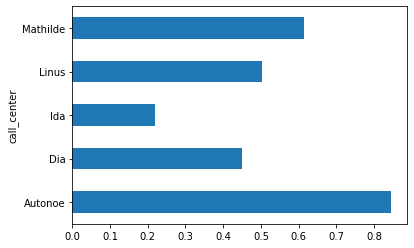

In [8]:
n3['calls_assistants_rate'].plot(kind='barh')

Success rate

In [9]:
success_rate = successful_calls/calls
success_rate

call_center
Autonoe     0.060684
Dia         0.109319
Ida         0.066564
Linus       0.059783
Mathilde    0.064407
dtype: float64

Split date column

In [10]:
df['date'] = pd.to_datetime(df['time_of_call']).dt.date
df['time'] = pd.to_datetime(df['time_of_call']).dt.time

df.head()

,id,time_of_call,call_center,successful_call,assistant_enabled,agent_id,date,time
0,0,2019-04-04 11:33:51.713444+00:00,Ida,0.0,False,8331,2019-04-04,11:33:51.713444
1,1,2019-04-09 14:27:50.291550+00:00,Ida,0.0,True,8331,2019-04-09,14:27:50.291550
2,2,2019-04-09 17:39:22.662744+00:00,Ida,0.0,True,8331,2019-04-09,17:39:22.662744
3,3,2019-04-11 09:03:31.830776+00:00,Ida,0.0,True,8331,2019-04-11,09:03:31.830776
4,4,2019-04-11 11:49:32.845973+00:00,Ida,0.0,True,8331,2019-04-11,11:49:32.845973


Add column 'calls'

In [11]:
df['calls'] = np.ones(len(df))
df.head()

,id,time_of_call,call_center,successful_call,assistant_enabled,agent_id,date,time,calls
0,0,2019-04-04 11:33:51.713444+00:00,Ida,0.0,False,8331,2019-04-04,11:33:51.713444,1.0
1,1,2019-04-09 14:27:50.291550+00:00,Ida,0.0,True,8331,2019-04-09,14:27:50.291550,1.0
2,2,2019-04-09 17:39:22.662744+00:00,Ida,0.0,True,8331,2019-04-09,17:39:22.662744,1.0
3,3,2019-04-11 09:03:31.830776+00:00,Ida,0.0,True,8331,2019-04-11,09:03:31.830776,1.0
4,4,2019-04-11 11:49:32.845973+00:00,Ida,0.0,True,8331,2019-04-11,11:49:32.845973,1.0


One dataframe for each call center

In [12]:
Autonoe_df = df[df.call_center=='Autonoe']
Dia_df = df[df.call_center=='Dia']
Ida_df = df[df.call_center=='Ida']
Linus_df = df[df.call_center == 'Linus']
Mathilde_df = df[df.call_center == 'Mathilde']

Group by date

In [13]:
Autonoe_grouped = Autonoe_df.groupby(['date']).agg({'successful_call':'sum','calls':'sum'})
Dia_grouped = Dia_df.groupby(['date']).agg({'successful_call':'sum', 'calls':'sum'})
Ida_grouped = Ida_df.groupby(['date']).agg({'successful_call':'sum', 'calls':'sum'})
Linus_grouped = Linus_df.groupby(['date']).agg({'successful_call':'sum', 'calls':'sum'})
Mathilde_grouped = Mathilde_df.groupby(['date']).agg({'successful_call':'sum', 'calls':'sum'})

#Autonoe_grouped

Add success rate column

In [14]:
Autonoe_grouped['success_rate'] = Autonoe_grouped['successful_call']/Autonoe_grouped['calls']
Dia_grouped['success_rate'] = Dia_grouped['successful_call']/Dia_grouped['calls']
Ida_grouped['success_rate'] = Ida_grouped['successful_call']/Ida_grouped['calls']
Linus_grouped['success_rate'] = Linus_grouped['successful_call']/Linus_grouped['calls']
Mathilde_grouped['success_rate']= Mathilde_grouped['successful_call']/Mathilde_grouped['calls']

#Autonoe_grouped

Success rate graph

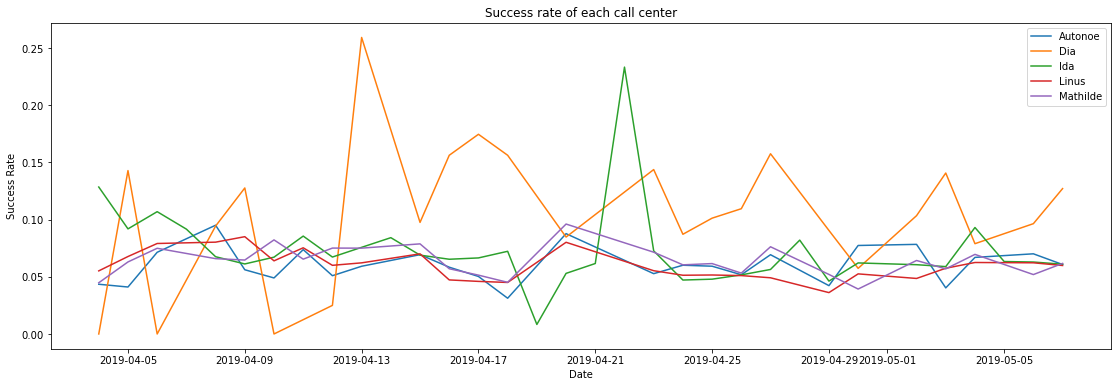

<Figure size 432x288 with 0 Axes>

In [15]:
plt.figure(figsize=(19,6))
ax = plt.subplot()

Autonoe_grouped['success_rate'].plot()
Dia_grouped['success_rate'].plot()
Ida_grouped['success_rate'].plot()
Linus_grouped['success_rate'].plot()
Mathilde_grouped['success_rate'].plot()

plt.legend(['Autonoe','Dia','Ida', 'Linus', 'Mathilde'])
plt.xlabel('Date')
plt.ylabel('Success Rate')
plt.title('Success rate of each call center')
plt.show()

plt.savefig('success_rate_graph.png')

Is there any statistically significant difference between call center success rates?

In [16]:
#ANOVA test

anv = stats.f_oneway(Autonoe_grouped['success_rate'], 
                                Dia_grouped['success_rate'],Ida_grouped['success_rate'], 
                                Linus_grouped['success_rate'], Mathilde_grouped['success_rate'])
anv


#Ho: All pairs of samples are same
#H1: At least one call center is significantly different

#p=4.18x10^(-6) = 0.00000418 < 0.05

#We reject H0, the success rate of at least one call center is significantly different.

F_onewayResult(statistic=8.369087970540622, pvalue=4.817056413727577e-06)

Which call center is significantly different?

In [17]:
#We compare each call center to Mathilde (its success rate is similar to Autonoe, Ida and Linus)

#t-test

Autonoe_tt = stats.ttest_ind(Autonoe_grouped.success_rate, Mathilde_grouped.success_rate)
Autonoe_tt

Ttest_indResult(statistic=-0.8975225634217522, pvalue=0.3737416591060645)

In [18]:
Dia_tt= stats.ttest_ind(Dia_grouped.success_rate, Mathilde_grouped.success_rate)
Dia_tt

Ttest_indResult(statistic=3.3970050331815402, pvalue=0.001360123647217948)

In [19]:
Ida_tt = stats.ttest_ind(Ida_grouped.success_rate, Mathilde_grouped.success_rate)
Ida_tt

Ttest_indResult(statistic=1.3201358142425281, pvalue=0.19206666786790672)

In [20]:
Linus_tt = stats.ttest_ind(Linus_grouped.success_rate, Mathilde_grouped.success_rate)
Linus_tt

Ttest_indResult(statistic=-1.1183834994234263, pvalue=0.26874783141892516)

In [21]:
#Only Dia is significantly different. p=0.0013 < 0.05

Does the usage of i2x assistant help the call centers to be successful?

In [22]:
#Fisher's test
a = df[df['successful_call']==1.]
a = a[a['assistant_enabled']==True]
a = len(a)

b = df[df['successful_call']==0.]
b = b[b['assistant_enabled']==True]
b = len(b)

c = df[df['successful_call']==1.]
c = c[c['assistant_enabled']==False]
c = len(c)

d = df[df['successful_call']==0.]
d = d[d['assistant_enabled']==False]
d = len(d)

In [23]:
contingency_table = np.array([[a,b],
                             [c,d]])
contingency_table

array([[ 2184, 30485],
       [ 2267, 32980]])

In [24]:
contingency_table_1 = pd.DataFrame(contingency_table, columns=['Assistant enabled', 'Assistant not enabled'])
contingency_table_1.index = ['Successful call', 'Not successful call'] 

contingency_table_1

,Assistant enabled,Assistant not enabled
Successful call,2184,30485
Not successful call,2267,32980


In [25]:
oddsratio, p_value = stats.fisher_exact(contingency_table_1)
p_value

0.1871867864741057

In [26]:
#H0: Assisted calls and success are statistically independent.
#H1: Assisted calls and success are not statistically independent.

#We have no evidence to reject the null hypothesis.

Does the usage of i2x assistant help individual agents to be successful?

In [27]:
agents_grouped = df.groupby('agent_id').sum()
#agents_grouped

agents_grouped['agent_success_rate'] = agents_grouped['successful_call']/agents_grouped['calls']
agents_grouped.sort_values(by = ['agent_success_rate'], ascending=False, inplace=True)
agents_grouped
agents_grouped.drop(columns=['id'])

,successful_call,assistant_enabled,calls,agent_success_rate
agent_id,,,,
7673,28.0,79,82.0,0.341463
14834,23.0,19,70.0,0.328571
17487,3.0,11,11.0,0.272727
5440,1.0,0,4.0,0.250000
9402,12.0,1,51.0,0.235294
...,...,...,...,...
14540,0.0,3,19.0,0.000000
14442,0.0,36,36.0,0.000000
14309,0.0,112,112.0,0.000000


In [28]:
#Correlation test
agents_grouped['successful_call'].corr(agents_grouped['assistant_enabled'])

#There is a moderate positive relationship between i2x assistant and successful calls.

0.5028053370166118